### Assignment No 04
Use the Google stock prices dataset and design a time series analysis and prediction system using RNN.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Loads historical stock data (e.g., Google stock) from a CSV file into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/BE_SEM_II_Lab/goog1.csv")

In [ ]:
# Displays the first few rows of the dataset to understand the structure
df.head()


,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [ ]:
# Focuses on the 'Close' column (stock closing prices) for prediction.

df_req = df['Close']


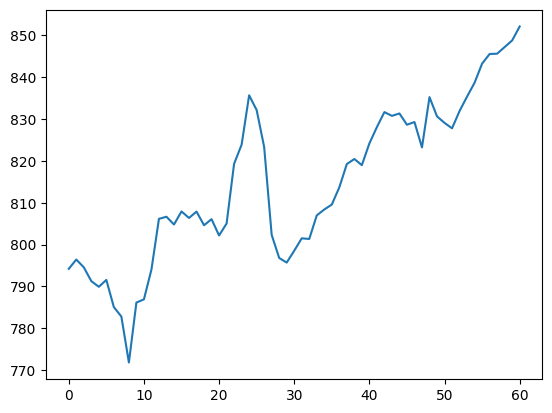

In [ ]:
plt.plot(df_req)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scales the closing prices to a 0–1 range using MinMaxScaler

scaler = MinMaxScaler()
df_req = scaler.fit_transform(np.array(df_req).reshape(-1,1))


In [ ]:
# Splits data: 80% for training, 20% for testing

training_size = int(len(df_req)*0.8)
df_train = df_req[:training_size, :]
df_test = df_req[training_size:len(df_req), :]

In [ ]:
# Creates time-series data:
def create_dataset(data, step=4):
    X = []
    y = []
    for i in range(len(data)-step):
        X.append(data[i:i+step, :])
        y.append(data[i, :])

    return np.array(X), np.array(y)

x_train, y_train = create_dataset(df_train)
x_test, y_test = create_dataset(df_test)

In [ ]:
x_train


array([[[0.27870496],
        [0.30635093],
        [0.28318798],
        [0.24209223]],

       [[0.30635093],
        [0.28318798],
        [0.24209223],
        [0.22527981]],

       [[0.28318798],
        [0.24209223],
        [0.22527981],
        [0.24570341]],

       [[0.24209223],
        [0.22527981],
        [0.24570341],
        [0.16475695]],

       [[0.22527981],
        [0.24570341],
        [0.16475695],
        [0.13661236]],

       [[0.24570341],
        [0.16475695],
        [0.13661236],
        [0.        ]],

       [[0.16475695],
        [0.13661236],
        [0.        ],
        [0.17833138]],

       [[0.13661236],
        [0.        ],
        [0.17833138],
        [0.18779601]],

       [[0.        ],
        [0.17833138],
        [0.18779601],
        [0.27646347]],

       [[0.17833138],
        [0.18779601],
        [0.27646347],
        [0.42752207]],

       [[0.18779601],
        [0.27646347],
        [0.42752207],
        [0.43374872]],

       [[0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Sequential LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Trains the LSTM model for 50 epochs.

model.fit(x_train, y_train, epochs=50)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1990
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1521
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1384
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0901
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0599
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0362
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0144
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0083
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0197
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0280
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0233
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0139
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0095
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0088
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0107 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━

In [ ]:
# Evaluates the trained model on test data and returns the loss (MSE)
metrics = model.evaluate(x_test, y_test)
metrics

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step - loss: 0.0013


0.0012668841518461704

In [ ]:
# Predictions (y_pred) and actual values (y_test) are rescaled back to original values using inverse_transform
y_pred = scaler.inverse_transform(model.predict(x_test))
y_test = scaler.inverse_transform(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step


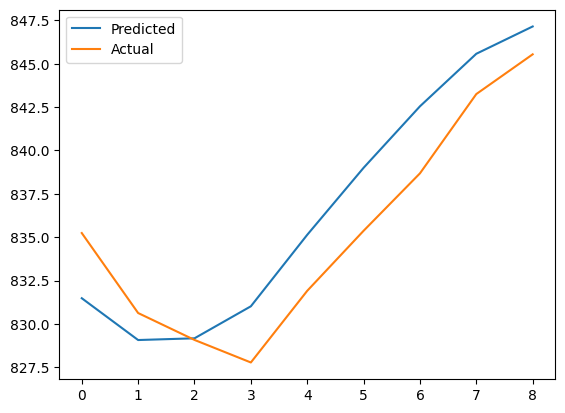

In [ ]:
# Plots predicted stock prices vs actual to visually compare performance

plt.plot(y_pred, label="Predicted")
plt.plot(y_test, label="Actual")
plt.legend()
